In [1]:
import destinations
import pandas as pd

destinations_list = ["Mont Saint Michel",
                        "St Malo",
                        "Bayeux",
                        "Le Havre",
                        "Rouen",
                        "Paris",
                        "Amiens",
                        "Lille",
                        "Strasbourg",
                        "Chateau du Haut Koenigsbourg",
                        "Colmar",
                        "Eguisheim",
                        "Besancon",
                        "Dijon",
                        "Annecy",
                        "Grenoble",
                        "Lyon",
                        "Gorges du Verdon",
                        "Bormes les Mimosas",
                        "Cassis",
                        "Marseille",
                        "Aix en Provence",
                        "Avignon",
                        "Uzes",
                        "Nimes",
                        "Aigues Mortes",
                        "Saintes Maries de la mer",
                        "Collioure",
                        "Carcassonne",
                        "Ariege",
                        "Toulouse",
                        "Montauban",
                        "Biarritz",
                        "Bayonne",
                        "La Rochelle"]

#destinations_list = destinations.destinationsList




In [2]:
print(destinations_list)

['Mont Saint Michel', 'St Malo', 'Bayeux', 'Le Havre', 'Rouen', 'Paris', 'Amiens', 'Lille', 'Strasbourg', 'Chateau du Haut Koenigsbourg', 'Colmar', 'Eguisheim', 'Besancon', 'Dijon', 'Annecy', 'Grenoble', 'Lyon', 'Gorges du Verdon', 'Bormes les Mimosas', 'Cassis', 'Marseille', 'Aix en Provence', 'Avignon', 'Uzes', 'Nimes', 'Aigues Mortes', 'Saintes Maries de la mer', 'Collioure', 'Carcassonne', 'Ariege', 'Toulouse', 'Montauban', 'Biarritz', 'Bayonne', 'La Rochelle']


In [3]:
df = pd.DataFrame (destinations_list, columns = ['cities'])
print (df)

                          cities
0              Mont Saint Michel
1                        St Malo
2                         Bayeux
3                       Le Havre
4                          Rouen
5                          Paris
6                         Amiens
7                          Lille
8                     Strasbourg
9   Chateau du Haut Koenigsbourg
10                        Colmar
11                     Eguisheim
12                      Besancon
13                         Dijon
14                        Annecy
15                      Grenoble
16                          Lyon
17              Gorges du Verdon
18            Bormes les Mimosas
19                        Cassis
20                     Marseille
21               Aix en Provence
22                       Avignon
23                          Uzes
24                         Nimes
25                 Aigues Mortes
26      Saintes Maries de la mer
27                     Collioure
28                   Carcassonne
29        

In [4]:
# importing geopy library
#!pip install geopy
from lib2to3.pgen2.pgen import DFAState
from geopy.geocoders import Nominatim
#import geopy

# getting length of list
length = len(df)

# calling the Nominatim tool
loc = Nominatim(user_agent="GetLoc")

df = df.assign(latitude='0')
df = df.assign(longitude='0')

for i in df.index:
    getLoc = loc.geocode(df['cities'][i])
    df['latitude'][i] = getLoc.latitude
    df['longitude'][i] = getLoc.longitude

df

,cities,latitude,longitude
0,Mont Saint Michel,48.635954,-1.51146
1,St Malo,48.649518,-2.026041
2,Bayeux,49.276462,-0.702474
3,Le Havre,49.493898,0.107973
4,Rouen,49.440459,1.093966
5,Paris,48.85889,2.320041
6,Amiens,49.894171,2.295695
7,Lille,50.636565,3.063528
8,Strasbourg,48.584614,7.750713
9,Chateau du Haut Koenigsbourg,48.24949,7.344296


In [5]:
import os

weather_api_key=os.environ['WEATHER_API_KEY']

import urllib.request, json 

weather = pd.DataFrame(columns=['city','lat','lon','time','temp'])

for i in df.index:
    lat = str(df['latitude'][i])
    lon = str(df['longitude'][i])
    city = df['cities'][i]
    with urllib.request.urlopen("https://api.openweathermap.org/data/2.5/forecast?lat="+lat+"&lon="+lon+"&appid="+weather_api_key+"&units=metric&lang=fr") as url:
        data = json.load(url)
        for content in data['list']:
            #print(type(content))
            #print(content)
            #meteo = {'city': city, 'time': content['dt_txt'], 'temp': content['main']['temp'], 'weather': content['weather']['main']}
            meteo = {'city': city, 'lat' : lat, 'lon' : lon, 'time': content['dt_txt'], 'temp' : content['main']['temp']}
            weather = weather.append(meteo, ignore_index=True)
            #print(meteo)
            #print(content['dt_txt'])
            #for line in content:
                #meteo = {'city': city, 'time': line['dt_txt'], 'temp': line['main']['temp'], 'weather': line['weather']['main']}
                #print(line)
    
    #for i in data:
    #    print(type(i))

    
print(weather)
#json_data = [] # your list with json objects (dicts)





C:\Users\frede\AppData\Local\Temp\ipykernel_8892\437306318.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather = weather.append(meteo, ignore_index=True)
C:\Users\frede\AppData\Local\Temp\ipykernel_8892\437306318.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather = weather.append(meteo, ignore_index=True)
C:\Users\frede\AppData\Local\Temp\ipykernel_8892\437306318.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather = weather.append(meteo, ignore_index=True)
C:\Users\frede\AppData\Local\Temp\ipykernel_8892\437306318.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather = weather.append(meteo, ignore_inde

                   city         lat                 lon                 time  \
0     Mont Saint Michel  48.6359541  -1.511459954959514  2022-11-13 15:00:00   
1     Mont Saint Michel  48.6359541  -1.511459954959514  2022-11-13 18:00:00   
2     Mont Saint Michel  48.6359541  -1.511459954959514  2022-11-13 21:00:00   
3     Mont Saint Michel  48.6359541  -1.511459954959514  2022-11-14 00:00:00   
4     Mont Saint Michel  48.6359541  -1.511459954959514  2022-11-14 03:00:00   
...                 ...         ...                 ...                  ...   
1395        La Rochelle  46.1591126          -1.1520434  2022-11-18 00:00:00   
1396        La Rochelle  46.1591126          -1.1520434  2022-11-18 03:00:00   
1397        La Rochelle  46.1591126          -1.1520434  2022-11-18 06:00:00   
1398        La Rochelle  46.1591126          -1.1520434  2022-11-18 09:00:00   
1399        La Rochelle  46.1591126          -1.1520434  2022-11-18 12:00:00   

       temp  
0     18.39  
1     16.63

C:\Users\frede\AppData\Local\Temp\ipykernel_8892\437306318.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather = weather.append(meteo, ignore_index=True)
C:\Users\frede\AppData\Local\Temp\ipykernel_8892\437306318.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather = weather.append(meteo, ignore_index=True)
C:\Users\frede\AppData\Local\Temp\ipykernel_8892\437306318.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather = weather.append(meteo, ignore_index=True)
C:\Users\frede\AppData\Local\Temp\ipykernel_8892\437306318.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather = weather.append(meteo, ignore_inde

In [6]:
#Creation of a dataframe with the average temperature for the next coming days

df_mean = weather.groupby(['city','lat','lon'])[['temp']].mean()
df_mean = df_mean.sort_values(by=['temp'],ascending=False)
df_mean = df_mean.reset_index()

df_mean['lat'] = df_mean['lat'].astype(float)
df_mean['lon'] = df_mean['lon'].astype(float)
df_mean['temp'] = round(df_mean['temp'].astype(float),2)

df_mean.to_csv('./bookingscraper/weather.csv',index=False)
#df.to_csv(index=False)

In [7]:
df_mean

,city,lat,lon,temp
0,Marseille,43.296174,5.369953,16.71
1,Cassis,43.214036,5.539632,16.59
2,Saintes Maries de la mer,43.452277,4.428717,16.49
3,Aigues Mortes,43.565823,4.191284,16.05
4,Collioure,42.525050,3.083155,15.90
5,Bormes les Mimosas,43.150697,6.341928,15.63
6,Bayonne,43.494514,-1.473666,15.07
7,Biarritz,43.471144,-1.552727,14.95
8,La Rochelle,46.159113,-1.152043,14.74
9,Carcassonne,43.213036,2.349107,14.55


In [8]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import plotly.io as pio
import kaleido

#df_mean = df_mean[:5]

# df_mean['text'] = df['city'] + '<br>Temperature ' + (df_mean['temp']).astype(str)+' °'
df_mean['text'] = df_mean['city'] + '<br>' + (df_mean['temp']).astype(str)+' °'

px.set_mapbox_access_token(open(".mapbox_token").read())
#df_car = px.data.carshare()
#df_car
mapbox = px.scatter_mapbox(df_mean, lat="lat", lon="lon", color="temp", size="temp", text="text" , hover_name="city", zoom=4)
#df_car
mapbox.show()

In [9]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import plotly.io as pio
import kaleido

df_mean = df_mean[:5]

# df_mean['text'] = df['city'] + '<br>Temperature ' + (df_mean['temp']).astype(str)+' °'
df_mean['text'] = df_mean['city'] + '<br>' + (df_mean['temp']).astype(str)+' °'

px.set_mapbox_access_token(open(".mapbox_token").read())
#df_car = px.data.carshare()
#df_car
mapbox = px.scatter_mapbox(df_mean, lat="lat", lon="lon", color="temp", size="temp", text="text" , hover_name="city", zoom=5)
#df_car
mapbox.show()

C:\Users\frede\AppData\Local\Temp\ipykernel_8892\2165087304.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: C:\Users\frede\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


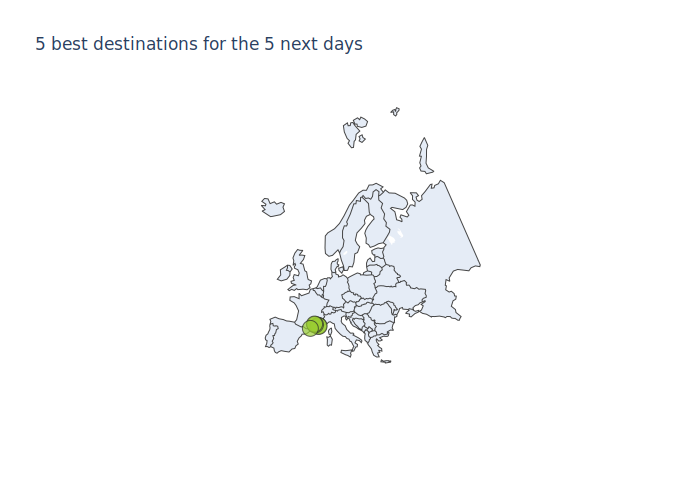

In [10]:
import plotly.graph_objects as go
import pandas as pd
import plotly.io as pio

pio.renderers.default = "svg"
!pip install kaleido

df_mean = df_mean[:5]

# df_mean['text'] = df['city'] + '<br>Temperature ' + (df_mean['temp']).astype(str)+' °'
df_mean['text'] = df_mean['city'] + '<br>Temperature ' + (df_mean['temp']).astype(str)+' °'
# limits = [(0,9),(10,14),(15,19),(20,24),(25,35)]
# colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
# cities = []
# scale = 40

fig = go.Figure(data=go.Scattergeo(
    #locationmode = 'country names',
    #locations = ["France"],
    lon = df_mean['lon'],
    lat = df_mean['lat'],
    text = df_mean['text'],
    mode = 'markers',
    marker = dict(size = df_mean['temp'],line_color='rgb(40,40,40)'),
    marker_color = "yellowgreen"
    #sizemode = 'diameter'
))

fig.update_layout(
    title = '5 best destinations for the 5 next days',
    geo_scope = 'europe',
    #size="pop"
)

fig.show()

In [14]:
hotel1 = df_mean[:1]
hotel1['city'] = hotel1['city'].astype(str)
hotel1 = hotel1.reset_index(drop=True)
hotel1_city = hotel1['city'].to_string(index=False)

hotels = pd.read_json('./bookingscraper/json/booking_hotels.json')
#hotels = hotels[hotels['hotel_city'] == hotel1_city]
#hotels
hotels = hotels[hotels["hotel_city"].str.contains(hotel1_city)]
#hotels[hotels["hotel_city"].str.contains(hotel1_city)]
#hotels
hotels

C:\Users\frede\AppData\Local\Temp\ipykernel_8892\991357693.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel_city,hotel_url,hotel_name,hotel_description,hotel_score,hotel_coord
16,Marseille,https://www.booking.com/hotel/fr/cocon-chic-du...,Cocon chic du Vieux port / Clim,[Situé dans le quartier du Vieux Port - La Can...,"9,4","43.29644580,5.37697550"
17,Marseille,https://www.booking.com/hotel/fr/le-petit-pani...,"Le Petit Panier ""La Boutique"" Studio familial ...","[Au cœur de Marseille, à proximité du Musée de...",None,"43.29784950,5.36543370"
18,Marseille,https://www.booking.com/hotel/fr/les-toits-de-...,Les Toits de la Canebière - Studio tout confort,"[Situé au cœur de Marseille, à 2 km de la plag...","9,0","43.29606533,5.37683839"
19,Marseille,https://www.booking.com/hotel/fr/le-coup-de-fo...,Le coup de foudre 1827,[Vous pouvez bénéficier d'une réduction Genius...,"9,1","43.29355977,5.39212170"
20,Marseille,https://www.booking.com/hotel/fr/le-studio-des...,Le studio des dames,[Le studio des dames propose un hébergement av...,"9,0","43.29834210,5.36640920"
21,Marseille,https://www.booking.com/hotel/fr/superbe-appar...,Superbe appartement tout équipé avec parking.,[Situé dans le quartier Euromed - La Joliette ...,"9,0","43.30192840,5.36647310"
22,Marseille,https://www.booking.com/hotel/fr/charmant-stud...,Charmant studio avec balcon Marseille centre,"[Situé à Marseille, à 2,7 km de la station de ...","9,0","43.30981200,5.39887990"
23,Marseille,https://www.booking.com/hotel/fr/domus-see-and...,Domus Sea and City,[Situé dans le quartier de la Corniche à Marse...,"9,0","43.28319300,5.36167300"
24,Marseille,https://www.booking.com/hotel/fr/studio-fond-d...,STUDIO FOND DE JARDIN CHEZ JEAN-LUC,[Situé dans le quartier de La Corniche à Marse...,"9,2","43.28405050,5.36163360"
25,Marseille,https://www.booking.com/hotel/fr/pytheas-carre...,Pytheas Carré d'Or,[Situé dans le quartier du Prado-Perier à Mars...,"9,5","43.27244922,5.38725679"


In [12]:
#hotel1_city = hotel1['city'].to_string(index=False)
#hotels.assign(lat=lambda x: x.hotel_coord.split(',',1)[0])
#hotels['lat'] = df.apply(lambda row: row.Cost, axis = 1)
hotels['hotel_coord'] = hotels['hotel_coord'].astype('string')
hotels[['lat','lon']] = hotels.hotel_coord.str.split(",",expand=True,)

hotels['lat'] = hotels['lat'].astype(float)
hotels['lon'] = hotels['lon'].astype(float)
#hotels['hotel_score'] = hotels['hotel_score'].replace(',','.')
#hotels['hotel_score'] = hotels['hotel_score'].astype(float)

#hotels.assign(lat=lambda x: x['hotel_coord'].str.split(",")[0])
#hotels['lat'] = hotels['hotel_coord'].str.split(',')
hotels.info()
hotels

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 9 to 118
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_city         25 non-null     object 
 1   hotel_url          25 non-null     object 
 2   hotel_name         25 non-null     object 
 3   hotel_description  25 non-null     object 
 4   hotel_score        23 non-null     object 
 5   hotel_coord        25 non-null     string 
 6   lat                25 non-null     float64
 7   lon                25 non-null     float64
dtypes: float64(2), object(5), string(1)
memory usage: 1.8+ KB


,hotel_city,hotel_url,hotel_name,hotel_description,hotel_score,hotel_coord,lat,lon
9,Marseille,https://www.booking.com/hotel/fr/le-nid-du-pan...,LE NID DU PANIER - Climatisé - Proche vieux port,"[Set in Marseille, 2.3 km from Plage des Catal...",None,"43.29852896,5.36703117",43.298529,5.367031
79,Marseille,https://www.booking.com/hotel/fr/jolie-t3-vue-...,"Appartement entièrement rénové, ensoleillé, à ...",[Situé dans le quartier Saint-Charles à Marsei...,"9,2","43.30241240,5.37756090",43.302412,5.377561
82,Marseille,https://www.booking.com/hotel/fr/cocon-chic-du...,Cocon chic du Vieux port / Clim,[Situé dans le quartier du Vieux Port - La Can...,"9,3","43.29644580,5.37697550",43.296446,5.376976
85,Marseille,https://www.booking.com/hotel/fr/le-petit-pani...,"Le Petit Panier ""La Boutique"" Studio familial ...","[Au cœur de Marseille, à proximité du Musée de...",None,"43.29784950,5.36543370",43.297849,5.365434
86,Marseille,https://www.booking.com/hotel/fr/le-coup-de-fo...,Le coup de foudre 1827,[Vous pouvez bénéficier d'une réduction Genius...,"9,1","43.29355977,5.39212170",43.293560,5.392122
88,Marseille,https://www.booking.com/hotel/fr/les-toits-de-...,Les Toits de la Canebière - Studio tout confort,"[Situé au cœur de Marseille, à 2 km de la plag...","9,0","43.29606533,5.37683839",43.296065,5.376838
90,Marseille,https://www.booking.com/hotel/fr/le-studio-des...,Le studio des dames,[Le studio des dames propose un hébergement av...,"9,0","43.29834210,5.36640920",43.298342,5.366409
91,Marseille,https://www.booking.com/hotel/fr/superbe-appar...,Superbe appartement tout équipé avec parking.,[Situé dans le quartier Euromed - La Joliette ...,"9,0","43.30192840,5.36647310",43.301928,5.366473
92,Marseille,https://www.booking.com/hotel/fr/charmant-stud...,Charmant studio avec balcon Marseille centre,"[Situé à Marseille, à 2,7 km de la station de ...","9,0","43.30981200,5.39887990",43.309812,5.398880
96,Marseille,https://www.booking.com/hotel/fr/domus-see-and...,Domus Sea and City,[Situé dans le quartier de la Corniche à Marse...,"9,0","43.28319300,5.36167300",43.283193,5.361673


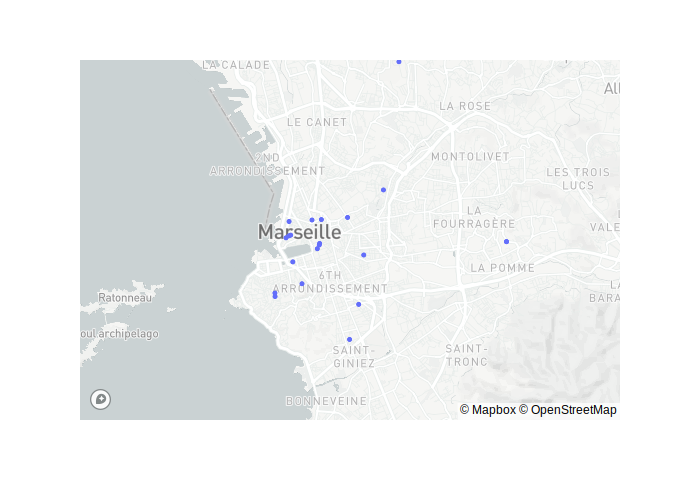

In [13]:
px.set_mapbox_access_token(open(".mapbox_token").read())
#df_car = px.data.carshare()
#df_car
mapbox = px.scatter_mapbox(hotels, lat="lat", lon="lon", zoom=11)
#df_car
mapbox.show()